In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

C:\Users\MG\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Preprocessing for Training Data

In [2]:
train_data = pd.read_csv('train_dataset.csv')
train_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0


In [3]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2293.0,7.082265,1.486029,0.000000,6.262799,7.080795,7.873272,14.000000
Hardness,2293.0,196.390335,32.460633,47.432000,176.753500,196.833001,216.441172,317.338124
Solids,2293.0,22074.335334,8668.693908,320.942611,15825.182571,21153.322827,27345.174288,56351.396304
Chloramines,2293.0,7.132987,1.573879,0.530351,6.140033,7.135063,8.104498,13.043806
Sulfate,2293.0,333.393347,36.116271,180.206746,316.552791,333.775777,349.985243,481.030642
Conductivity,2293.0,425.455702,80.266652,201.619737,363.974060,420.828362,480.715208,753.342620
Organic_carbon,2293.0,14.229174,3.341429,2.200000,12.015868,14.151538,16.450990,28.300000
Trihalomethanes,2293.0,66.499518,16.067742,0.738000,56.329076,66.396293,77.182622,124.000000
Turbidity,2293.0,3.967153,0.788480,1.450000,3.440753,3.947138,4.503661,6.739000
Potability,2293.0,0.390318,0.487928,0.000000,0.000000,0.000000,1.000000,1.000000


In [4]:
missing_percentage = train_data.isna().sum() / len(train_data) * 100

print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

Percentage of Missing Values in Each Column:
ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64


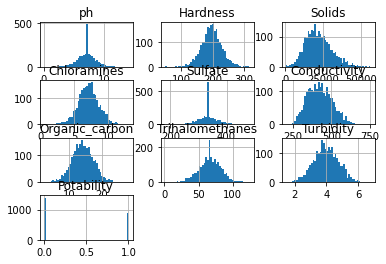

In [5]:
## Make sure the data is normally distributed 
train_data.hist(bins=50);

In [6]:
train_duplicates = train_data.duplicated()
print("Number of duplicate rows in training data:", train_duplicates.sum())


Number of duplicate rows in training data: 0


In [7]:
##Potability" column contains the target variable (the value you want to predict), and it should be separated from the rest of the data during the preprocessing and training process.
X_train = train_data.drop('Potability', axis=1).values
y_train = train_data['Potability'].values

In [8]:
# Apply Standard Scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data.drop('Potability', axis=1))

scaled_train_df = pd.DataFrame(X_train_scaled, columns=train_data.columns[:-1])

# Print the scaled DataFrame
print(scaled_train_df.head())

         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -0.000990  0.717454  0.015724    -0.799439  0.010591     -0.335680   
1 -0.200832 -0.084328 -0.968896    -1.246577 -0.267658      0.652954   
2 -0.721306 -0.364575 -0.707731     0.655997  2.439675     -1.382269   
3  0.683305  0.696445 -0.457153    -0.594864  0.010591     -0.609177   
4  0.666584  0.427671 -0.603564     1.055249  0.723456      1.666209   

   Organic_carbon  Trihalomethanes  Turbidity  
0       -0.816253         2.858068  -1.234154  
1        0.247520        -0.006426  -0.909709  
2        1.821607         1.071225   1.141856  
3        1.052800        -0.410202   0.395695  
4        0.908313         0.139407   1.414489  


# Data Preprocessing for Testing Data:


In [9]:
test_data = pd.read_csv('train_dataset.csv')
test_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0


In [10]:
X_test = test_data.drop('Potability', axis=1).values
y_test = test_data['Potability'].values

In [11]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(test_data.drop('Potability', axis=1))

scaled_test_df = pd.DataFrame(X_test_scaled, columns=test_data.columns[:-1])

# Print the scaled DataFrame
print(scaled_test_df.head())

         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0 -0.000990  0.717454  0.015724    -0.799439  0.010591     -0.335680   
1 -0.200832 -0.084328 -0.968896    -1.246577 -0.267658      0.652954   
2 -0.721306 -0.364575 -0.707731     0.655997  2.439675     -1.382269   
3  0.683305  0.696445 -0.457153    -0.594864  0.010591     -0.609177   
4  0.666584  0.427671 -0.603564     1.055249  0.723456      1.666209   

   Organic_carbon  Trihalomethanes  Turbidity  
0       -0.816253         2.858068  -1.234154  
1        0.247520        -0.006426  -0.909709  
2        1.821607         1.071225   1.141856  
3        1.052800        -0.410202   0.395695  
4        0.908313         0.139407   1.414489  


# DNN Model

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers

# # Build the DNN model
# model = keras.Sequential([
#     layers.Input(shape=(X_train_scaled.shape[1],)),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(32, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Build the DNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)

Epoch 1/20
58/58 [==============================] - 1s 5ms/step - loss: 0.6728 - accuracy: 0.6036 - val_loss: 0.6547 - val_accuracy: 0.6166
Epoch 2/20
58/58 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.6456 - val_loss: 0.6408 - val_accuracy: 0.6471
Epoch 3/20
58/58 [==============================] - 0s 2ms/step - loss: 0.6210 - accuracy: 0.6750 - val_loss: 0.6295 - val_accuracy: 0.6514
Epoch 4/20
58/58 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.6816 - val_loss: 0.6181 - val_accuracy: 0.6732
Epoch 5/20
58/58 [==============================] - 0s 2ms/step - loss: 0.5917 - accuracy: 0.6936 - val_loss: 0.6112 - val_accuracy: 0.6776
Epoch 6/20
58/58 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.7034 - val_loss: 0.6103 - val_accuracy: 0.6732
Epoch 7/20
58/58 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.7028 - val_loss: 0.6058 - val_accuracy: 0.6841
Epoch 8/20
58/58 [==

In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)



Accuracy: 0.7409507195813345


In [15]:

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1215  183]
 [ 411  484]]


In [16]:
# Classification report
class_report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.80      1398
           1       0.73      0.54      0.62       895

    accuracy                           0.74      2293
   macro avg       0.74      0.70      0.71      2293
weighted avg       0.74      0.74      0.73      2293



In [36]:
# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7949249126845215


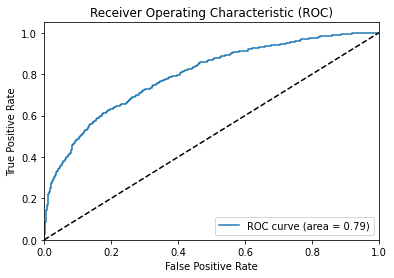

In [18]:
import matplotlib.pyplot as plt

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


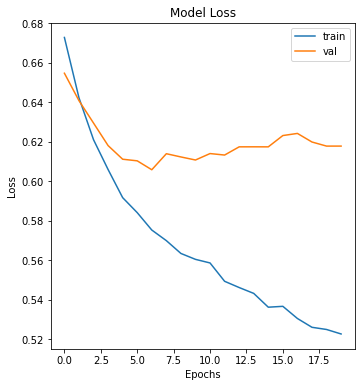

In [19]:
# Loss and accuracy plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

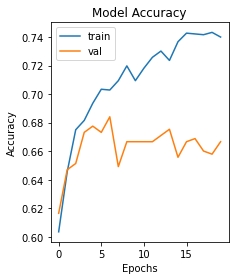

In [20]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()